Problem 3:

In this problem, we will use multiple linear regression to predict the fuel consumption of cars (measured in miles per gallon). The available predictors are: (i) cylinders, (ii) displacement, (iii) horsepower, (iv) weight,
(v) acceleration and (vi) model year. The dataset is named auto-mpg.csv, and can be found in Canvas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

with open('auto-mpg.csv') as file:
  lines = file.readlines()

# Remove meta data
data_lines = [line for line in lines if not line.startswith('#')]

Structuring the data into separate columns

In [2]:
mpg = []
cylinders = []
displacements = []
horsepowers = []
weights = []
accelerations = []
model_years = []

for line in data_lines:
  mpg_value, cylinder, displacement, horsepower, weight, acceleration, model_year = line.split()
  mpg.append(float(mpg_value))
  cylinders.append(float(cylinder))
  displacements.append(float(displacement))
  horsepowers.append(float(horsepower))
  weights.append(float(weight))
  accelerations.append(float(acceleration))
  model_years.append(float(model_year))

data = pd.DataFrame({
  'MPG': mpg,
  'Cylinders': cylinders,
  'Displacement': displacements,
  'Horsepower': horsepowers,
  'Weight': weights,
  'Acceleration': accelerations,
  'Model Year': model_years
})
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0


Prepare data by extracting the features (X) from the target variable (y)

In [3]:
X = data[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']]
y = data[['MPG']]

print('Features:')
print(X)

print('Target value:')
print(y)

Features:
     Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year
0          8.0         307.0       130.0  3504.0          12.0        70.0
1          8.0         350.0       165.0  3693.0          11.5        70.0
2          8.0         318.0       150.0  3436.0          11.0        70.0
3          8.0         304.0       150.0  3433.0          12.0        70.0
4          8.0         302.0       140.0  3449.0          10.5        70.0
..         ...           ...         ...     ...           ...         ...
387        4.0         140.0        86.0  2790.0          15.6        82.0
388        4.0          97.0        52.0  2130.0          24.6        82.0
389        4.0         135.0        84.0  2295.0          11.6        82.0
390        4.0         120.0        79.0  2625.0          18.6        82.0
391        4.0         119.0        82.0  2720.0          19.4        82.0

[392 rows x 6 columns]
Target value:
      MPG
0    18.0
1    15.0
2    18.0
3    16.0
4 

Since y only contains one column, we need to convert y to 2D array(m, 1)
(This got handled automatically by numpy, therefor no need to do it)

In [4]:
def linear_regression(X, y):

    # Convert y to a 2D array (m, 1) (Handeled automatically by numpy, but added a check instead)
    # y = y.values.reshape(-1, 1)

    # If y is not already a 2D array, reshape it
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)
        
    # Compute Theta using the normal equation
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [5]:
# STANDARDIZATION - feature scaling method 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now use X_scaled to fit your linear regression model
theta_scaled = linear_regression(X_scaled, y)

In [6]:
# NORMALIZATION - feature scaling method 
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
# Now use X_normalized to fit your linear regression model
theta_normalized = linear_regression(X_normalized, y)

In [7]:
# Each element in theta corresponds to a specific feature in my model, including the intercept. 
# The linear regression model predicts the target variable (y, which is MPG)

theta = linear_regression(X, y)
theta_standard = linear_regression(X_scaled, y)
theta_normal = linear_regression(X_normalized, y)
print("Estimated Parameters (Theta):")
print(theta)
print("Estimated Parameters (Theta) with Standardization:")
print(theta_standard)
print("Estimated Parameters (Theta) with Normalization:")
print(theta_normal)


Estimated Parameters (Theta):
        MPG
0 -0.522609
1  0.010221
2 -0.020873
3 -0.006395
4 -0.052022
5  0.610259
Estimated Parameters (Theta) with Standardization:
        MPG
0 -0.561950
1  0.802476
2 -0.015045
3 -5.764000
4  0.234957
5  2.771664
Estimated Parameters (Theta) with Normalization:
         MPG
0   5.570452
1  -3.171600
2  42.304493
3 -42.065934
4  36.440853
5  15.238099


Making predictions.
Even tho theta has 6 elements that matches the X`s number of columns, i got 'matrices are not aligned' error
This might be caused by X being an np.array and theta being a pd.DataFrame
---> Need to convert theta to np.array

In [8]:
print("Predicted MPG values:")
# y_pred = X @ theta # This performs the matrix multiplication to get predictions


Predicted MPG values:


In [9]:
X = np.array(X)
theta = np.array(theta)
print(X)
print(theta)

y_pred = X @ theta
print("Predicted MPG values:")
y_pred[:5]

[[   8.   307.   130.  3504.    12.    70. ]
 [   8.   350.   165.  3693.    11.5   70. ]
 [   8.   318.   150.  3436.    11.    70. ]
 ...
 [   4.   135.    84.  2295.    11.6   82. ]
 [   4.   120.    79.  2625.    18.6   82. ]
 [   4.   119.    82.  2720.    19.4   82. ]]
[[-0.5226089 ]
 [ 0.01022108]
 [-0.020873  ]
 [-0.00639456]
 [-0.05202195]
 [ 0.61025869]]
Predicted MPG values:


array([[15.93081361],
       [14.45720405],
       [16.11263762],
       [15.93670419],
       [16.10071197]])

3C)  Evaluation of the model

In [10]:
# Calculate the mean squared error
mse = np.mean((y - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")



# Calculate the total sum of squares (SS_total)
ss_total = np.sum((y - np.mean(y)) ** 2)
# Calculate the residual sum of squares (SS_residual)
ss_residual = np.sum((y - y_pred) ** 2)
# Calculate the R-squared value
r_squared = 1 - (ss_residual / ss_total)
print(f"R-squared: {r_squared}")




Mean Squared Error: 11.870425215015214
R-squared: MPG    0.804643
dtype: float64


/Users/jonasandersen/Library/CloudStorage/OneDrive-UiTOffice365/FYS-2021/Exercises/venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


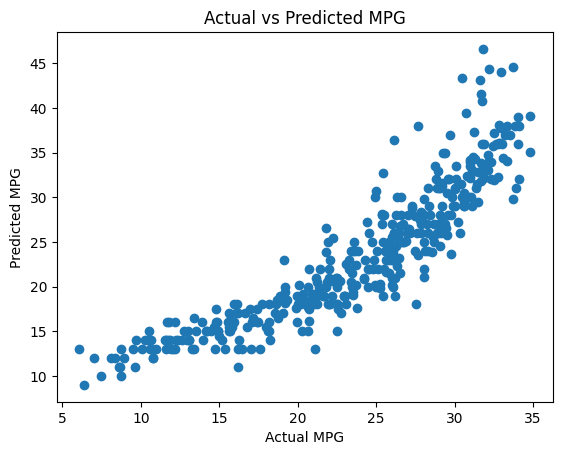

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.show()


3B
Explain why the magnitudes of the estimated coefficients are so different. What could be done to prevent this from happening?

when feature s have varying units or ranges, the coefficients adjust to these scales, witch can lead to large differences in their magnitudes

Eks:
----> Cylinders might range from 4 to 8.
----> Displacement could range from 100 to 500 cubic inches.

when the coefficients have widely different magnitudes, it becomes challenging ot interpret their relative importance. 
Eks: 
---> A car`s cylinder, ranged from 4 to 8 in the data set, might have a bigger impact on the fuel consumption than the horse power of the car (measured in 100 - 500)

Solution: Feature scaling
to fix this, i can apply 'feature scaling' techniques like STANDARDIZATION or NORMALIZATION to my input features before fitting/training the model


​

STANDARDIZATION
--> transforming the features to have a mean of 0 and a standard of 1

z = (x - μ (mean) ) / σ (deviation)

NORMALIZATION
---> this scales the features to a fixed range, typically [0, 1]

x′ = ( x − min(x) ) / ( max(x) − min(x) ) 

​
